<a href="https://colab.research.google.com/github/fisherj1/Neural/blob/task13/Lesson_12_FeatEng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lesson 12 - Feature engineering

Feature engineering (конструирование признаков) — это процесс использования предметной области данных для создания признаков, которые нужны для обучения машин. Конструирование признаков является неформальной областью, но считается существенным в машинном обучении.

Признак — это качество или свойство, присущее *всем* независимым объектам, анализ которых или прогноз для которых мы делаем. Любое качество может быть полезным, если оно полезно для модели.

Смысл признака и чем он отличается от качества, легче было бы понять в контексте задачи. Признак является характеристикой, которая может помочь решить задачу.

Процесс конструирования признаков — это создание гипотезы о признаках, которые могут помочь в решении задачи, реализация этих признаков и проверка. Подход является итеративным и эмпирическим.

## Методы конструирования признаков

### Отбор признаков

Отбор признаков - процесс отбора подмножества значимых признаков (переменных зависимых и независимых) для использования в построении модели.

Техники отбора признаков используются по четырём причинам:

*   упрощение моделей для того, чтобы сделать их проще для интерпретации исследователями
*   более короткое время тренировки
*   устранение проклятия размерности (экспоненциального роста необходимых экспериментальных данных в зависимости от размерности пространства)
*   улучшенное обобщение путём сокращения переобучения (формально, уменьшение дисперсии).

Иногда данные содержат некоторые признаки, которые либо излишни, либо незначимы, например не очень разнообразные (например в датасете с картинками одно изображение объекта, и смещённое на пару пикселей).
Классическими местами применения отбора признаков являются анализ рукописных текстов, табличные данные, где имеется много тысяч признаков и от десятков до сотен экземпляров выборки.

#### Реализация

Клессическим методом отбора признаков является ручной просмотр данных в датасете и нахождение признаков, которые могут быть отброшены из датасета по какому-либо критерию. 

Положим в медицинском датасете есть такие данные: фио, год рождения, возраст, пол, количество обращений к врачам, записи кардиограмм, вес в килограммах, вес в фунтах...

Очевидно, что тут есть лишние данные: возраст есть функция от года рождения, а вес из килограммов можно привести в фунты и обратно. Значит эти два столбца данных не не несут никакой полезной информации для нейронной сети и их можно отбросить, отобрав только необходимые.

### Выделение признаков

Технику выделения признаков (иногда называется методом сокращения размерности) следует отличать от отбора признаков. Выделение признаков создаёт новые признаки как функции от оригинальных признаков, в то время как отбор признаков возвращает подмножество признаков. Выделение признаков начинает с исходного набора данных, выводит вторичные значения (признаки), для которых предполагается, что они **должны быть информативными и не быть избыточными**, что способствует последующему процессу обучения сети и обобщению шагов, а в некоторых случаях ведёт и к лучшей человеческой интерпретацией данных.

**Алгоритмы выбора признаков**

Существует три основных класса алгоритмов выбора признаков: методы фильтрации, методы-оболочки и встроенные методы.

#### **Методы фильтрации (Filter Methods)** 
Методы выбора признаков с помощью фильтра применяют статистическую меру для присвоения оценки каждому признаку. Признаки ранжируются по количеству баллов и выбираются для сохранения или удаления из набора данных. Эти методы часто являются одномерными и рассматривают признак независимо или в отношении зависимой переменной (другого признака).

Некоторые примеры некоторых методов фильтрации включают критерий хи-квадрат, получение информации и коэффициенты корреляции.

#### **Методы комбинации (Wrapper Methods)**
Методы комбинации рассматривают выбор набора признаков как проблему поиска, когда различные комбинации подготавливаются, оцениваются и сравниваются с другими комбинациями. Лучшей функцией для оценки комбинации признаков и присвоения баллов является accuracy модели.

Процесс поиска может быть методическим, например поиск лучшего первого, он может быть стохастическим, например алгоритм случайного подъема на холм, или он может использовать эвристические методы, такие как прямой и обратный проходы, для добавления и удаления признаков.

Примером метода-оболочки является алгоритм устранения рекурсивной функции.

#### Embedded Methods
Embedded Methods изучают, какие признаки лучше всего способствуют точности модели во время ее создания. Наиболее распространенными являются методы регуляризации.

Методы регуляризации также называются методами штрафов, которые вводят дополнительные ограничения в оптимизацию алгоритма прогнозирования (например, алгоритма регрессии), что смещает модель в сторону меньшей сложности (меньшего количества коэффициентов) (в случае нейронных сетей могут быть очень затратны по времени).

Примерами алгоритмов регуляризации являются LASSO, Elastic Net и Ridge Regression.

![methods.png](https://raw.githubusercontent.com/Annndruha/neural_networks/master/Resources/methods.png?token=AMGK6JMAPUZPLGTRMEASVHC7ZX5IS)



## Пример 1

Обучим модель предсказывающую температуру на погодном датасете. Нам потребуется регрессионная модели или LSTM. Также потребуется преобразовать некоторые признаки в датасете для более корректной интерпретации их нейронной сетью.




In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### Фикс GPU
Если есть проблема с видеопамятью и tensorflow, а это проблема у многих, то можно вообще выключить GPU для tensorflow. Будет в 5 раз медленнее, зато всегда работает. Может на твоём железе заработает и так. А для GPU где мало памяти может потребоваться постепенный рост аллоцированной памяти вместо аллокации большим фрагментом.

In [2]:
GPU_fix = "MemoryFix" # Choose "Disable", "MemoryFix" or "None"

if GPU_fix == "Disable":
    try:
        # Disable all GPUS
        tf.config.set_visible_devices([], 'GPU')
        visible_devices = tf.config.get_visible_devices()
        for device in visible_devices:
            assert device.device_type != 'GPU'
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass
elif GPU_fix == "MemoryFix":
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13574144/13568290 [==============================] - 0s 0us/step


In [4]:
df = pd.read_csv(csv_path)
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


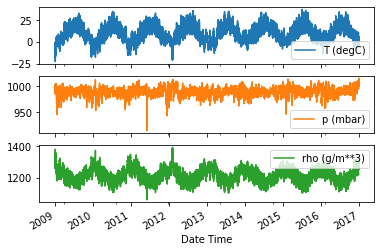

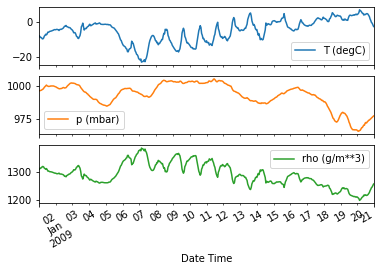

In [5]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


### Feature engineering



#### Ошибки в датасете

Теперь после просмотра некоторых значений датасета, понятно что некторые из них нужно преобразовать, например скорость ветра, видно что в датасете есть -9999. Это выглядит как ошибка, поэтому обнулим эти значения.

In [7]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

df['wv (m/s)'].min()

0.0

#### Направление ветра

Теперь посмотрим на другие значения. Например у направления скорости ветра интервал задан в градусах, градусы не очень удобная мера для обучения н.с., потому что 359 и 0 должны лежать рядом. Преобразуем направление ветра в вектор.

Text(0, 0.5, 'Wind Velocity [m/s]')

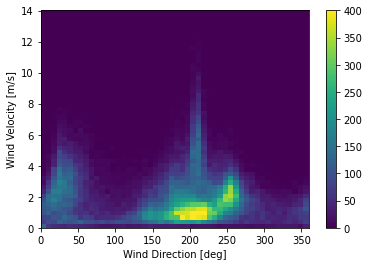

In [10]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [11]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

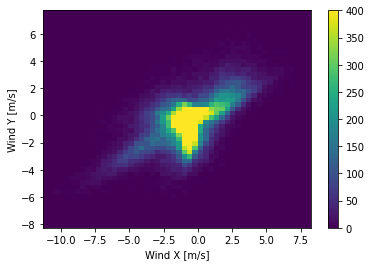

In [12]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

#### Время

Как и направление ветра, время в секундах не является полезным вводом модели. Данные о погоде имеют четкую ежедневную и годовую периодичность. Есть много способов справиться с периодичностью.

Простой способ преобразовать его в полезный сигнал - использовать sin и cos для преобразования времени в сигналы «Время дня» и «Время года»:

In [13]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

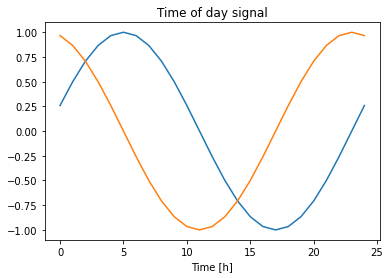

In [14]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

#### Нормализация данных

In [16]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

Важно нормализовать данные перед обучением нейронной сети. Нормализация - это обычный способ масштабирования. Это можно сделать вычитанием среднего значения и делением на дисперсию.

Среднее значение и стандартное отклонение следует вычислять только с использованием обучающих данных, чтобы модели не имели доступа к значениям в наборах для проверки и тестирования.

Также можно утверждать, что модель не должна иметь доступа к будущим значениям в обучающем наборе при обучении и что эта нормализация должна выполняться с использованием скользящих средних.

In [17]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

Теперь посмотрим на распределение параметров. Некоторые параметры имеют длинные хвосты, но нет очевидных ошибок, таких как значение скорости ветра -9999.

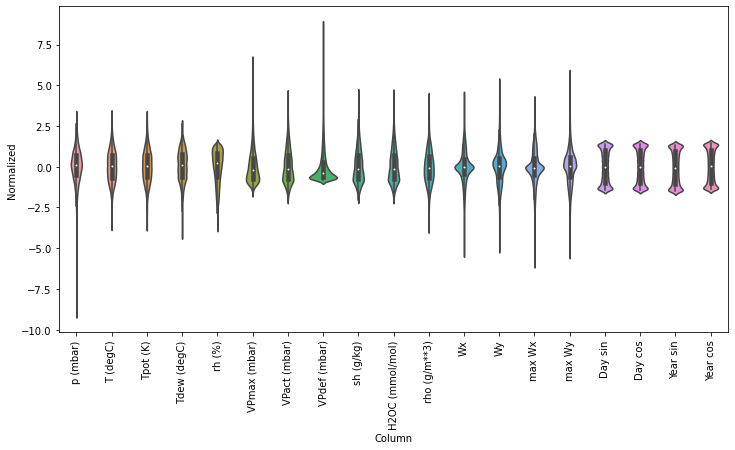

In [18]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

#### Настройка графики

В этом блоке кода мы настроим окна с графиками, чтобы было удобнее всего воспринимать и интерпретировать получаемые результаты.

In [19]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [20]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])

w1

w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

In [21]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [22]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
labels shape: (3, 1, 1)


In [23]:
w2.example = example_inputs, example_labels

In [24]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

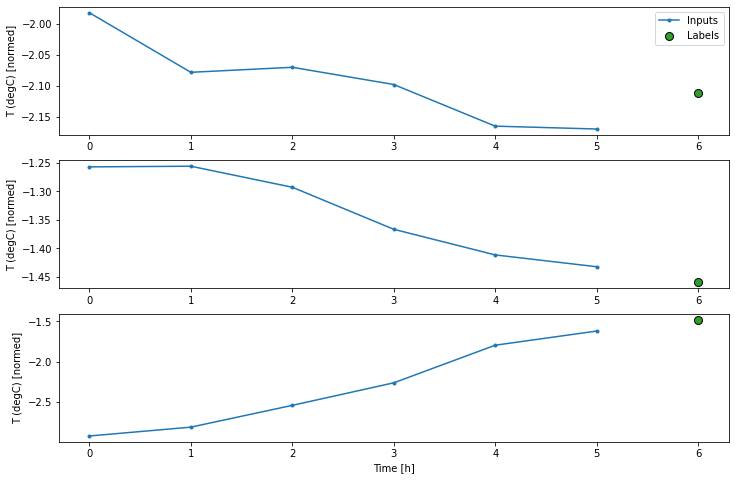

In [25]:
w2.plot()

#### Подготовка датасета

Создадим метод make_dataset, который принимает DataFrame временного ряда и преобразует его в tf.data.Dataset из пар (input_window, label_window) с помощью функции preprocessing.timeseries_dataset_from_array.

In [26]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [27]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [28]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [29]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [30]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [31]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


#### Создание и обучение модели

In [32]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Обучение модели

In [33]:
history = compile_and_fit(lstm_model, wide_window)

Epoch 1/20
1533/1533 [==============================] - 22s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0843 - val_loss: 0.0064 - val_mean_absolute_error: 0.0562
Epoch 2/20
1533/1533 [==============================] - 21s 13ms/step - loss: 0.0063 - mean_absolute_error: 0.0553 - val_loss: 0.0059 - val_mean_absolute_error: 0.0536
Epoch 3/20
1533/1533 [==============================] - 21s 13ms/step - loss: 0.0059 - mean_absolute_error: 0.0532 - val_loss: 0.0058 - val_mean_absolute_error: 0.0520
Epoch 4/20
1533/1533 [==============================] - 20s 13ms/step - loss: 0.0057 - mean_absolute_error: 0.0523 - val_loss: 0.0057 - val_mean_absolute_error: 0.0517
Epoch 5/20
1533/1533 [==============================] - 20s 13ms/step - loss: 0.0056 - mean_absolute_error: 0.0515 - val_loss: 0.0057 - val_mean_absolute_error: 0.0521
Epoch 6/20
1533/1533 [==============================] - 20s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0510 - val_loss: 0.0056 - val_mean_absolute_error:

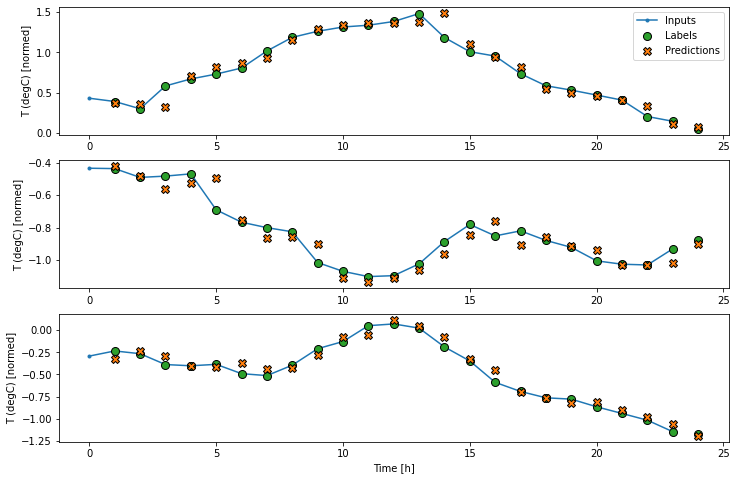

In [34]:
wide_window.plot(lstm_model)

## ✅ Задание

Попробуем обучить очень простую полносвязную сеть, применив метод выделения признаков.

Предположим, что несколько заранее посчитанных свёрток для датасета помогут лучше обучить нейросеть с такой же архитектурой, чем она обучится на одних картинках. То есть воспользуемся методом **выделения признаков** из уже существующих данных.

Зафиксиреум ключи рандомных генераторов, чтобы обеспечить воспроизводимость результатов.

In [35]:
import random

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import signal

tf.random.set_seed(777)
np.random.seed(777)
random.seed(777)

Обучим простейшую полносвязную сеть на датасете mnist для сравнения результатов с методом выделения признаков.

In [36]:
mnist_ref = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist_ref.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model_ref = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_ref.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
model_ref.summary()
history_ref = model_ref.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3292 - accuracy: 0.9075 - val_loss: 0.1830 - val_accuracy: 0.9467
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1611 - accuracy: 0.9534 - val_loss: 0.1288 - val_accuracy: 0.9622
Epoch 3/15
1875/1875 [=====

In [37]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255., x_test/255.
print(f"{x_train.shape}\n{x_test.shape}")

(60000, 28, 28)
(10000, 28, 28)


Посчитаем результат применения четырёх свёрток, первая выделяет вертикальные линии, вторая горизонатльные, третья и четвёртая диагональные.
```
-1 0 1      -1 -1 -1       0  1  1      1  1  0
-1 0 1       0  0  0      -1  0  1      1  0 -1
-1 0 1       1  1  1      -1 -1  0      0 -1 -1
```
После применения свёрток 3х3 на изображение 28х28 получатся изображения 26х26, это избыточная точность для нашей модели, поэтмоу чтобы изображения от свёрток не являлись доминирующим признаком, сожмём их до 10*10 пикселей. Иначе пикселей будет 60000х26х26х4, а в датасете 60000х28х28.

При сжатии сёртки внесут всего 60000х10х10х4 новых признаков.

 ✅ Написать реализацию свёрток, для датасета и сжатия до 10х10 пикселей.
 Объединить их с датасетом.

In [108]:
#добавляем все наши свертки в список kernels
kernels = []

kernels.append(np.array([[-1,0,1], [-1,0,1], [-1,0,1]]))
kernels.append(np.array([[-1,-1,-1], [0,0,0], [1,1,1]]))
kernels.append(np.array([[0,1,1], [-1,0,1], [-1,-1,0]]))
kernels.append(np.array([[1,1,0], [1,-1,0], [0,-1,-1]]))

#добавляем к сверткам еще одну размерность и преобразуем тип
for i in range(len(kernels)):
  kernels[i] = np.expand_dims(kernels[i], -1)
  kernels[i] = np.expand_dims(kernels[i], -1)
  kernels[i] = tf.constant(kernels[i], dtype=tf.float32)

(3, 3, 1, 1)
(3, 3, 1, 1)
(3, 3, 1, 1)
(3, 3, 1, 1)


In [143]:
new_train_x = np.expand_dims(x_train, -1) #добавляем еще одну размерность
new_train_x = new_train_x.astype('float32') #преобразуем тип
convs = [] 
for i in range(len(kernels)):
  convs.append(tf.nn.conv2d(new_train_x, kernels[i], 1, padding = "VALID")) #добавляем все полученные при свертке изображения в список convs
new_train_x = np.concatenate((convs[0], convs[1], convs[2], convs[3]), axis=-1) #объединяем полученные изображения

paddings = tf.constant([[0, 0,], [2, 2,], [2, 2], [0, 0,]]) 

new_train_x = tf.pad(new_train_x, paddings, "CONSTANT") #добаляем padding к изображениям (2 пикселя с каждой стороны)

train_x_conv = np.reshape(tf.nn.max_pool(new_train_x, 3, 3,  padding = "VALID"), (60000, 400)) #сжимаем изображения max_pool и преобразуем размерности
print(train_x_conv.shape) # Must be (60000, 400)

(60000, 400)


In [144]:
new_test_x = np.expand_dims(x_test, -1)
new_test_x = new_test_x.astype('float32')
convs = []
for i in range(len(kernels)):
  convs.append(tf.nn.conv2d(new_test_x, kernels[i], 1, padding = "VALID"))
new_test_x = np.concatenate((convs[0], convs[1], convs[2], convs[3]), axis=-1)

paddings = tf.constant([[0, 0,], [2, 2,], [2, 2], [0, 0,]])
new_test_x = tf.pad(new_test_x, paddings, "CONSTANT")

test_x_conv = np.reshape(tf.nn.max_pool(new_test_x, 3, 3,  padding = "VALID"), (10000, 400))
print(test_x_conv.shape) # Must be (60000, 400)

(10000, 400)



Объединяем сами картинки (разложенные в массив 1х784) с новыми признаками (100х4)

In [145]:
x_train_f = np.reshape(x_train, (60000, 784))
x_test_f = np.reshape(x_test, (10000, 784))
test = np.concatenate([x_test_f,test_x_conv], axis=1)
train = np.concatenate([x_train_f, train_x_conv], axis=1)
print(f"{test.shape}\n{train.shape}")

(10000, 1184)
(60000, 1184)


Создаём и обучаем такую же модель, но уже на датасете с добавлением признаков.

In [146]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1184,)),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
model.summary()
history = model.fit(train, y_train, epochs=15, validation_data=(test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1184)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                59250     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 59,760
Trainable params: 59,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1999 - accuracy: 0.9416 - val_loss: 0.1057 - val_accuracy: 0.9679
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0889 - accuracy: 0.9729 - val_loss: 0.0766 - val_accuracy: 0.9756
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0689 - accurac

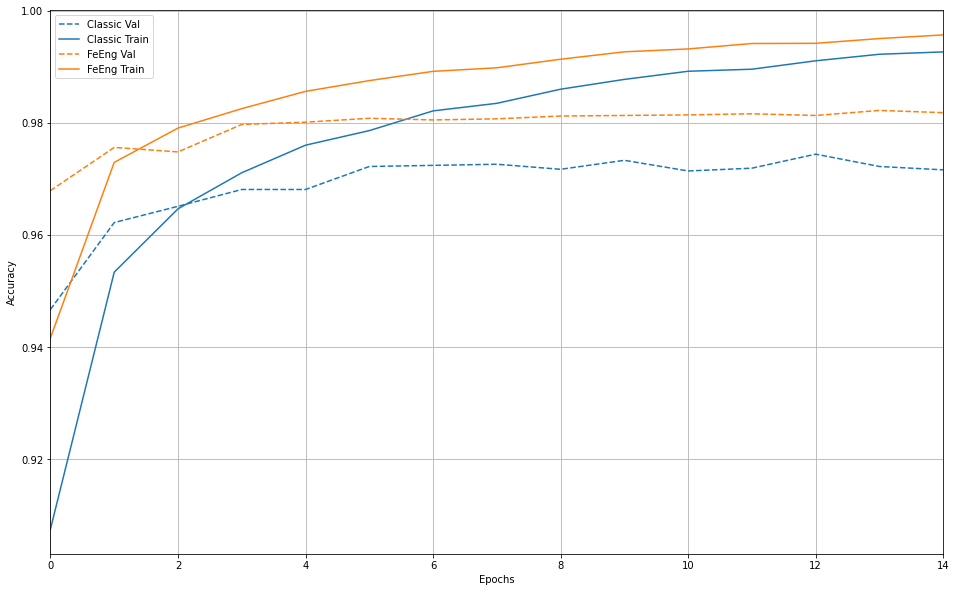

In [147]:
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
val = plt.plot(history_ref.epoch, history_ref.history['val_'+'accuracy'], '--', label='Classic Val')
plt.plot(history_ref.epoch, history_ref.history["accuracy"], color=val[0].get_color(), label='Classic Train')
val = plt.plot(history.epoch, history.history['val_'+'accuracy'], '--', label='FeEng Val')
plt.plot(history.epoch, history.history["accuracy"], color=val[0].get_color(), label='FeEng Train')
plt.legend()
plt.grid()
plt.xlim([0,max(history.epoch)])
plt.show()

Что должно получиться: 

![accuracy](https://raw.githubusercontent.com/Annndruha/neural_networks/master/Resources/dense.png?token=AMGK6JKMW75BLW5IU7VLLNC7ZX5CW)